<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 0

Autor: Lopez Cruz Juan Carlos


# Circuito a analizar:


<img src="./circuito_ts0.png" /> 

## Items a tratar del circuito:

1.  Obtener la función transferencia $\frac{V1}{V2}$:  módulo , fase y diagrama de polos y ceros.  
2.  Proponga una norma de frecuencia e impedancia  de forma tal de llegar a una transferencia normalizada
3.  Simule la transferencia normalizada en Python.
4.  Simule la red en LTspice y obtenga su respuesta en frecuencia.
5.  ¿ Que tipo de filtro es ? Analizar el caso del MF-103  ¿ Utiliza la misma red ?

## Resolucion:

### Calculo de la Transferencia H(s)
Primero empezamos por calcular la funcion transferencia H(s)=$\frac{V1}{V2}$ del circuito:
    


In [1]:
from IPython.display import IFrame
IFrame("./transf_ts0.pdf", width=1000, height=1000)

De esta transferencia (H(s)) calcularemos el modulo, la fase, y graficaremos los polos y ceros:

In [3]:
from IPython.display import IFrame
IFrame("./modulo_fase_ts0.pdf", width=1000, height=1000)

### Normalizacion de la transferencia H(s)

Procedemos a normalizar nuestra trasferencia

\begin{equation}
H(s) = -\frac{R2}{R1}\frac{s-\frac{R1R3}{R2C1}}{s+\frac{R3}{C1}}
\end{equation}

Primero normalizaremos en frecuencia:

\begin{equation}
\Omega_w = \frac{C1}{R3}
\end{equation}

Quedando nuestra transferecia como:

\begin{equation}
H(s) = -\frac{R2}{R1}\frac{s-\frac{R1}{R2}}{s+1}
\end{equation}

Para que nos quede como una transferencia pasa todo imponemos que $R1=R2$ por lo que nuestra funcion transferencia nos queda de la siguiente forma:

\begin{equation}
H(s) = -\frac{s-1}{s+1}
\end{equation}

Finalmente normalizamos en impedancia donde proponemos que $\Omega_z = R3$ quedando de la siguiente forma

\begin{equation}
\Omega_w = \frac{C1}{R3}
\end{equation}
\begin{equation}
\Omega_z = R3
\end{equation}

Donde si $R3 = 1$ nos queda que $\frac{C1}{R3}=1 \Rightarrow C1=1$

### Simulacion en Pythom

Ya obtenida la transferencia normalizada procederemos a simularlo mediante Python, donde primero cargaremos las funcione y modulos necesarios para poder hacer la simulacion.

In [42]:
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
mpl.rcParams['figure.figsize'] = (10,10)

# Modificamos el largo y ancho de la salida
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

# tamaño de la tipografía
fig_font_size = 11

plt.rcParams.update({'font.size':fig_font_size})

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

Ya con nuestras librerias y funciones cargadas procedemos a simular nuestra transferencia normalizada, pero realizaremos una ligera modificacion en la transferencia.

\begin{equation}
H(s) = -\frac{s-1}{s+1} = \frac{-s+1}{s+1}
\end{equation}

Esto lo realizamos para poder cargar los coeficientes en la funcion

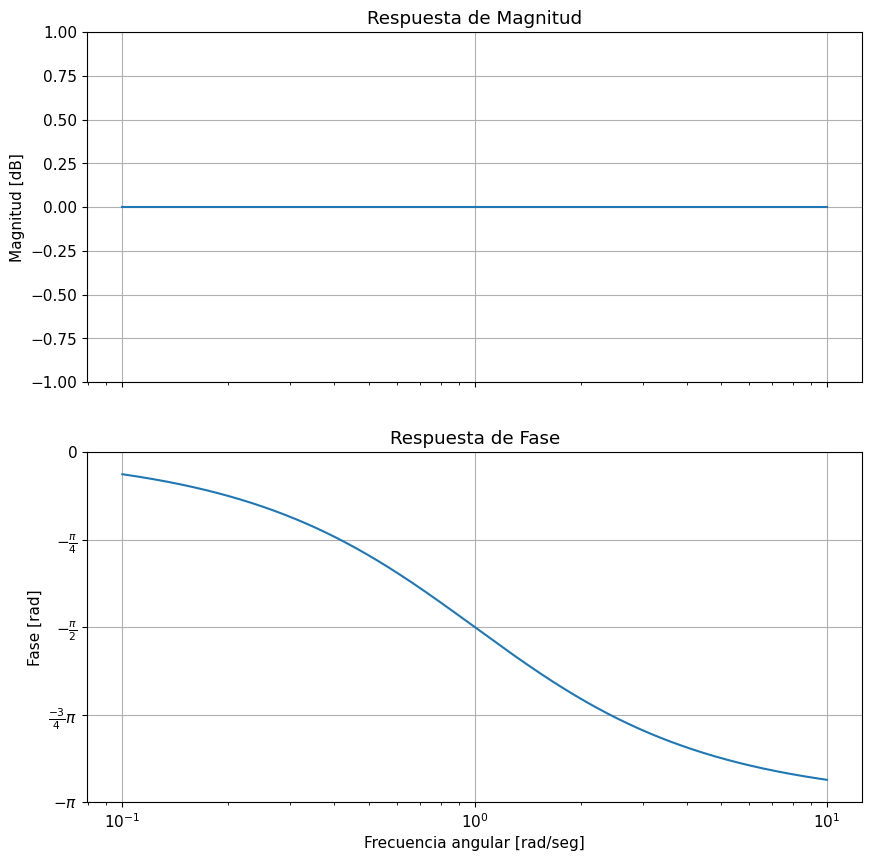

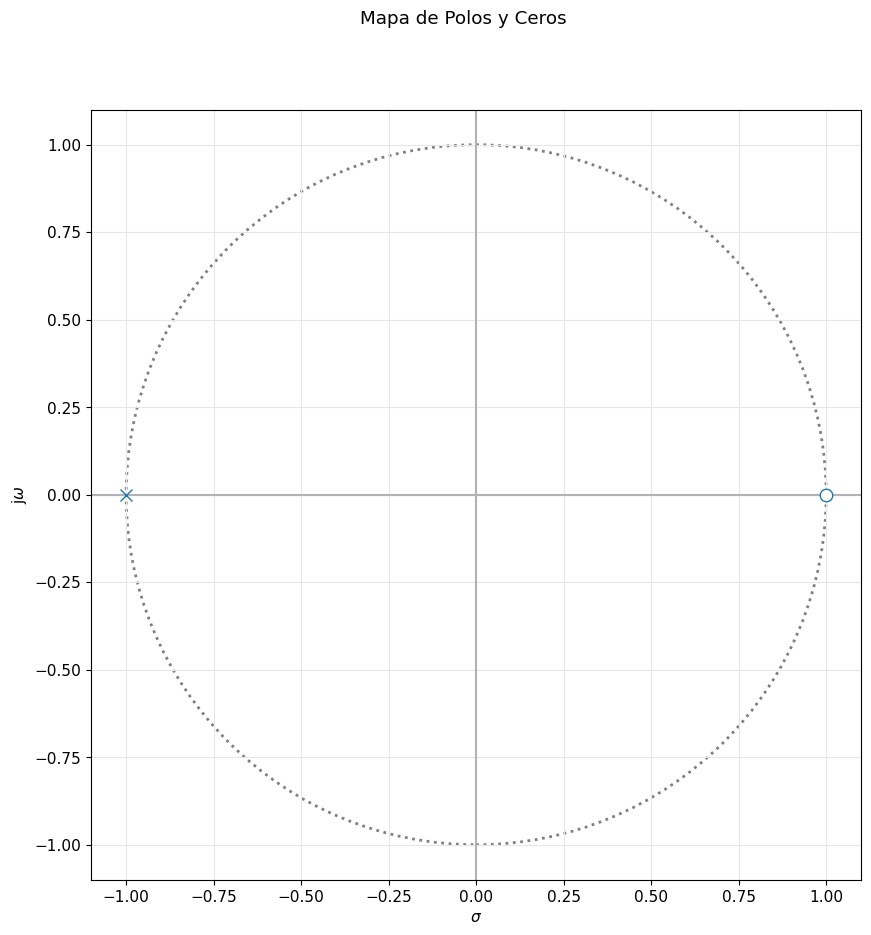

In [45]:
# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ -1, 1 ])
den = np.array([ 1, 1])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


### Simulacion en LTspice

Ya simulado en Python procedemos a simular nuestra red en LTspice para comprobar que nos de lo mismo

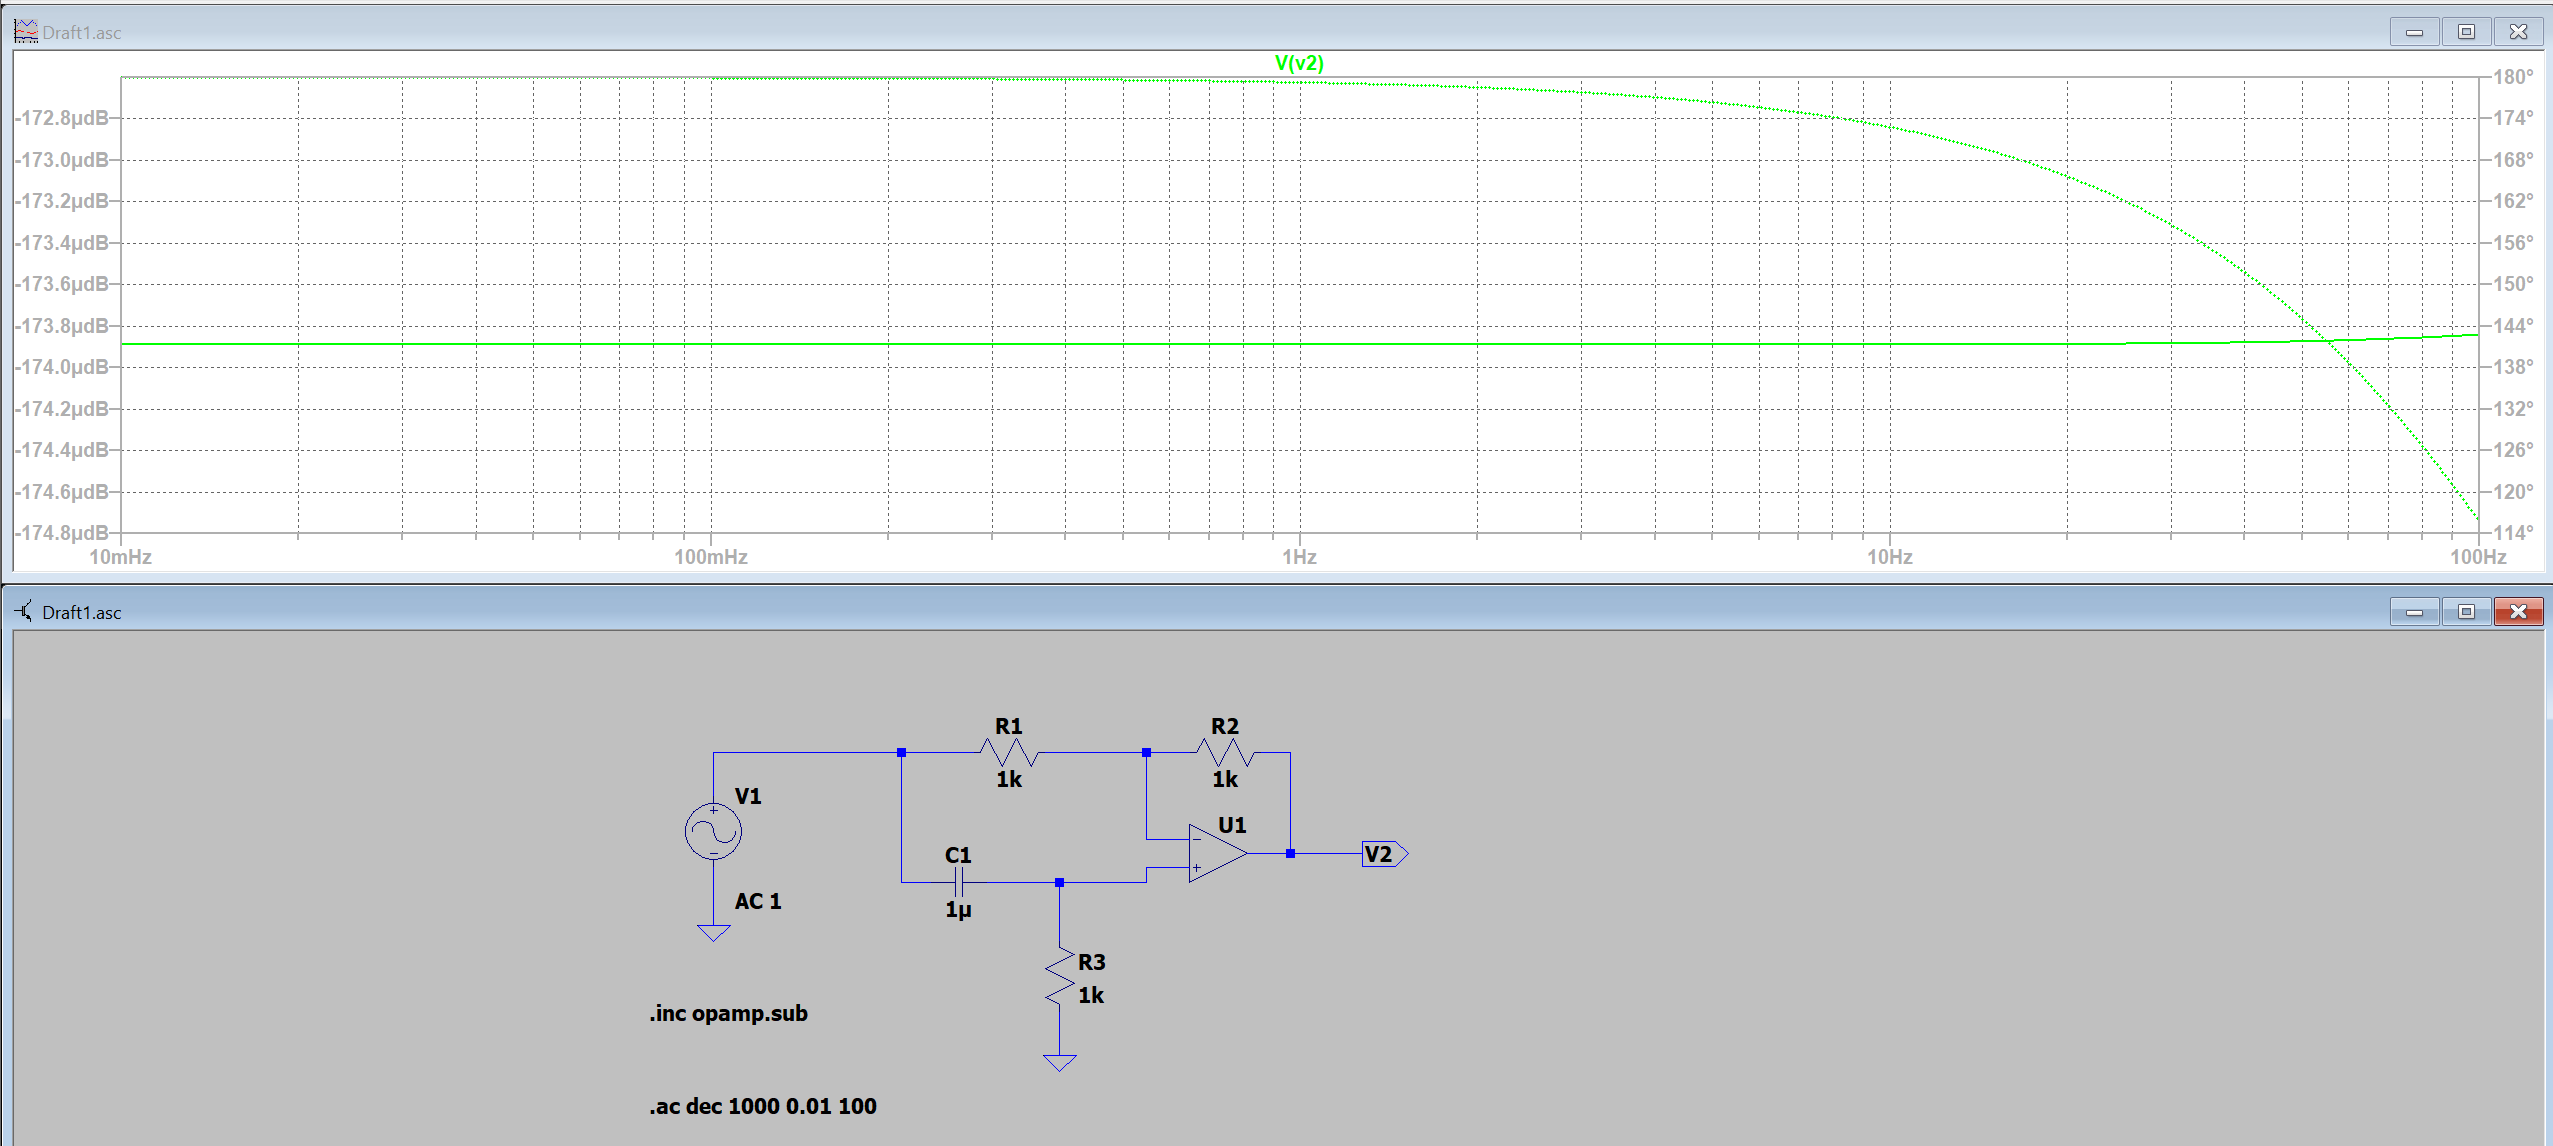

In [1]:
# Al ser una foto de resolucion grande se opto cambiar el codigo para representarlo
from IPython.display import display, Image
display(Image("./Simulacion_LTspice_ts0.png"))

### Tipo de filtro

Ya con todo lo vito podemos decir que si $R1 = R2$ estamos ante una transferencia pasa todo. Y si analizamos nuestra red con la [MF-103](https://www.synthxl.com/wp-content/uploads/2020/04/Moog-MF-103-Schematics.pdf) para ver si usa la misma red podemos notar siertos parecidos pero este ultimo es mas complejo y tiene mas componentes de intermedio que la red usada en esta tarea.